## CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT


- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


# STEP 1: IMPORT LIBRARIES AND DATASET

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p",mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p",mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p",mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
X_test.shape

(12630, 32, 32, 3)

## STEP 2: Image Exploration

1

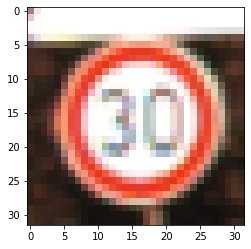

In [8]:
i = 3000
plt.imshow(X_train[i])
y_train[i]

25

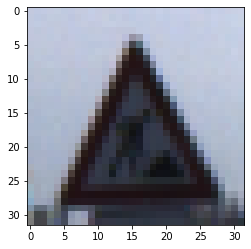

In [9]:
i = 4000
plt.imshow(X_test[i])
y_test[i]

26

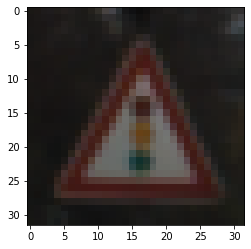

In [10]:
i = 200
plt.imshow(X_validation[i])
y_validation[i]

## STEP 3: DATA Prepration

In [11]:
from sklearn.utils import shuffle

X_train,y_train = shuffle(X_train,y_train )

In [12]:
X_train_gray = np.sum(X_train/3,axis = 3,keepdims = 3)
X_test_gray = np.sum(X_test/3,axis = 3,keepdims = 3)
X_validation_gray = np.sum(X_validation/3,axis = 3,keepdims = 3)

In [13]:
X_train_gray 

array([[[[ 57.        ],
         [ 79.66666667],
         [ 71.33333333],
         ...,
         [ 53.33333333],
         [ 85.66666667],
         [ 84.66666667]],

        [[102.66666667],
         [ 92.        ],
         [ 72.33333333],
         ...,
         [103.33333333],
         [117.33333333],
         [ 75.        ]],

        [[116.        ],
         [ 77.33333333],
         [ 34.33333333],
         ...,
         [136.33333333],
         [123.33333333],
         [105.        ]],

        ...,

        [[ 75.66666667],
         [ 91.66666667],
         [ 75.66666667],
         ...,
         [ 90.        ],
         [ 85.        ],
         [ 66.66666667]],

        [[ 98.66666667],
         [ 81.33333333],
         [ 99.        ],
         ...,
         [107.66666667],
         [ 81.66666667],
         [ 89.33333333]],

        [[ 73.33333333],
         [ 42.        ],
         [ 77.33333333],
         ...,
         [ 95.66666667],
         [ 73.66666667],
         [ 64.333

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

In [15]:
X_test_gray.shape

(12630, 32, 32, 1)

In [16]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [17]:
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128

In [18]:
X_train_gray_norm

array([[[[-0.5546875 ],
         [-0.37760417],
         [-0.44270833],
         ...,
         [-0.58333333],
         [-0.33072917],
         [-0.33854167]],

        [[-0.19791667],
         [-0.28125   ],
         [-0.43489583],
         ...,
         [-0.19270833],
         [-0.08333333],
         [-0.4140625 ]],

        [[-0.09375   ],
         [-0.39583333],
         [-0.73177083],
         ...,
         [ 0.06510417],
         [-0.03645833],
         [-0.1796875 ]],

        ...,

        [[-0.40885417],
         [-0.28385417],
         [-0.40885417],
         ...,
         [-0.296875  ],
         [-0.3359375 ],
         [-0.47916667]],

        [[-0.22916667],
         [-0.36458333],
         [-0.2265625 ],
         ...,
         [-0.15885417],
         [-0.36197917],
         [-0.30208333]],

        [[-0.42708333],
         [-0.671875  ],
         [-0.39583333],
         ...,
         [-0.25260417],
         [-0.42447917],
         [-0.49739583]]],


       [[[-0.43489583],


In [19]:
X_validation_gray_norm

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


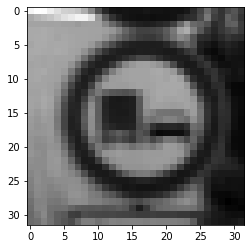

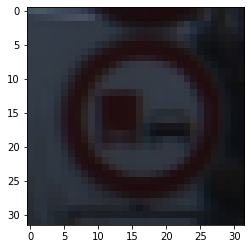

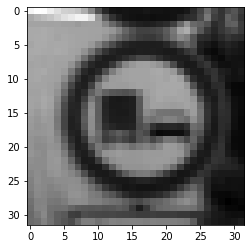

In [20]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')


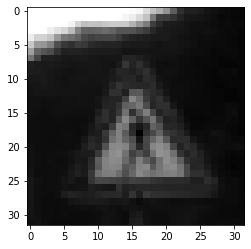

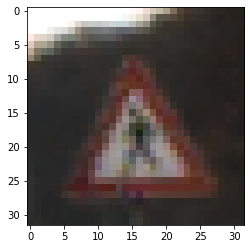

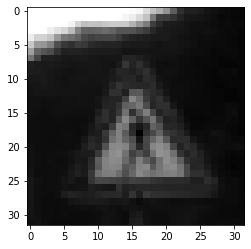

In [21]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

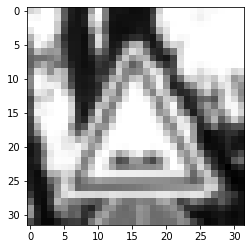

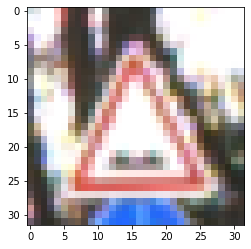

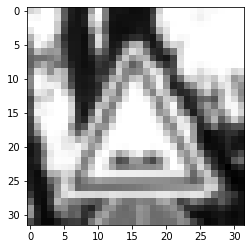

In [22]:
i = 610
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

## STEP :4 MODEL TRAINING

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Flatten,Dropout,Dense
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [24]:
image_shape = X_train_gray[i].shape

In [25]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))

cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters =16,kernel_size = (5,5),activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

          
cnn_model.add(Dense(units=120,activation = 'relu'))
          
cnn_model.add(Dense(units=84,activation = 'relu'))          
          
cnn_model.add(Dense(units=43,activation = 'softmax'))          


In [26]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [27]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [35]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size = 500,
             epochs = 50,
             verbose = 1,
             validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 20s 286ms/step - loss: 0.0306 - accuracy: 0.9909 - val_loss: 0.9356 - val_accuracy: 0.8592
Epoch 2/50
70/70 [==============================] - 20s 282ms/step - loss: 0.0198 - accuracy: 0.9941 - val_loss: 0.8682 - val_accuracy: 0.8735
Epoch 3/50
70/70 [==============================] - 19s 271ms/step - loss: 0.0083 - accuracy: 0.9982 - val_loss: 0.8023 - val_accuracy: 0.8805
Epoch 4/50
70/70 [==============================] - 19s 276ms/step - loss: 0.0070 - accuracy: 0.9985 - val_loss: 0.8419 - val_accuracy: 0.8780
Epoch 5/50
70/70 [==============================] - 19s 276ms/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.9145 - val_accuracy: 0.8703
Epoch 6/50
70/70 [==============================] - 20s 290ms/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 0.8675 - val_accuracy: 0.8776
Epoch 7/50
70/70 [==============================] - 20s 280ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.8868 - val_accuracy: 0.8737

# STEP 5: MODEL EVALUATION

In [36]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy : {:.4f}'.format(score[1]))

395/395 [==============================] - 4s 10ms/step - loss: 1.3913 - accuracy: 0.8813
Test Accuracy : 0.8813


In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']





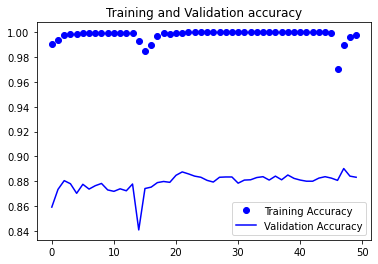

In [44]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

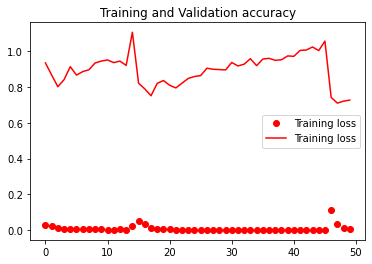

In [45]:
plt.plot(epochs,loss,'ro',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Training loss')
plt.title('Training and Validation accuracy')
plt.legend()

In [55]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


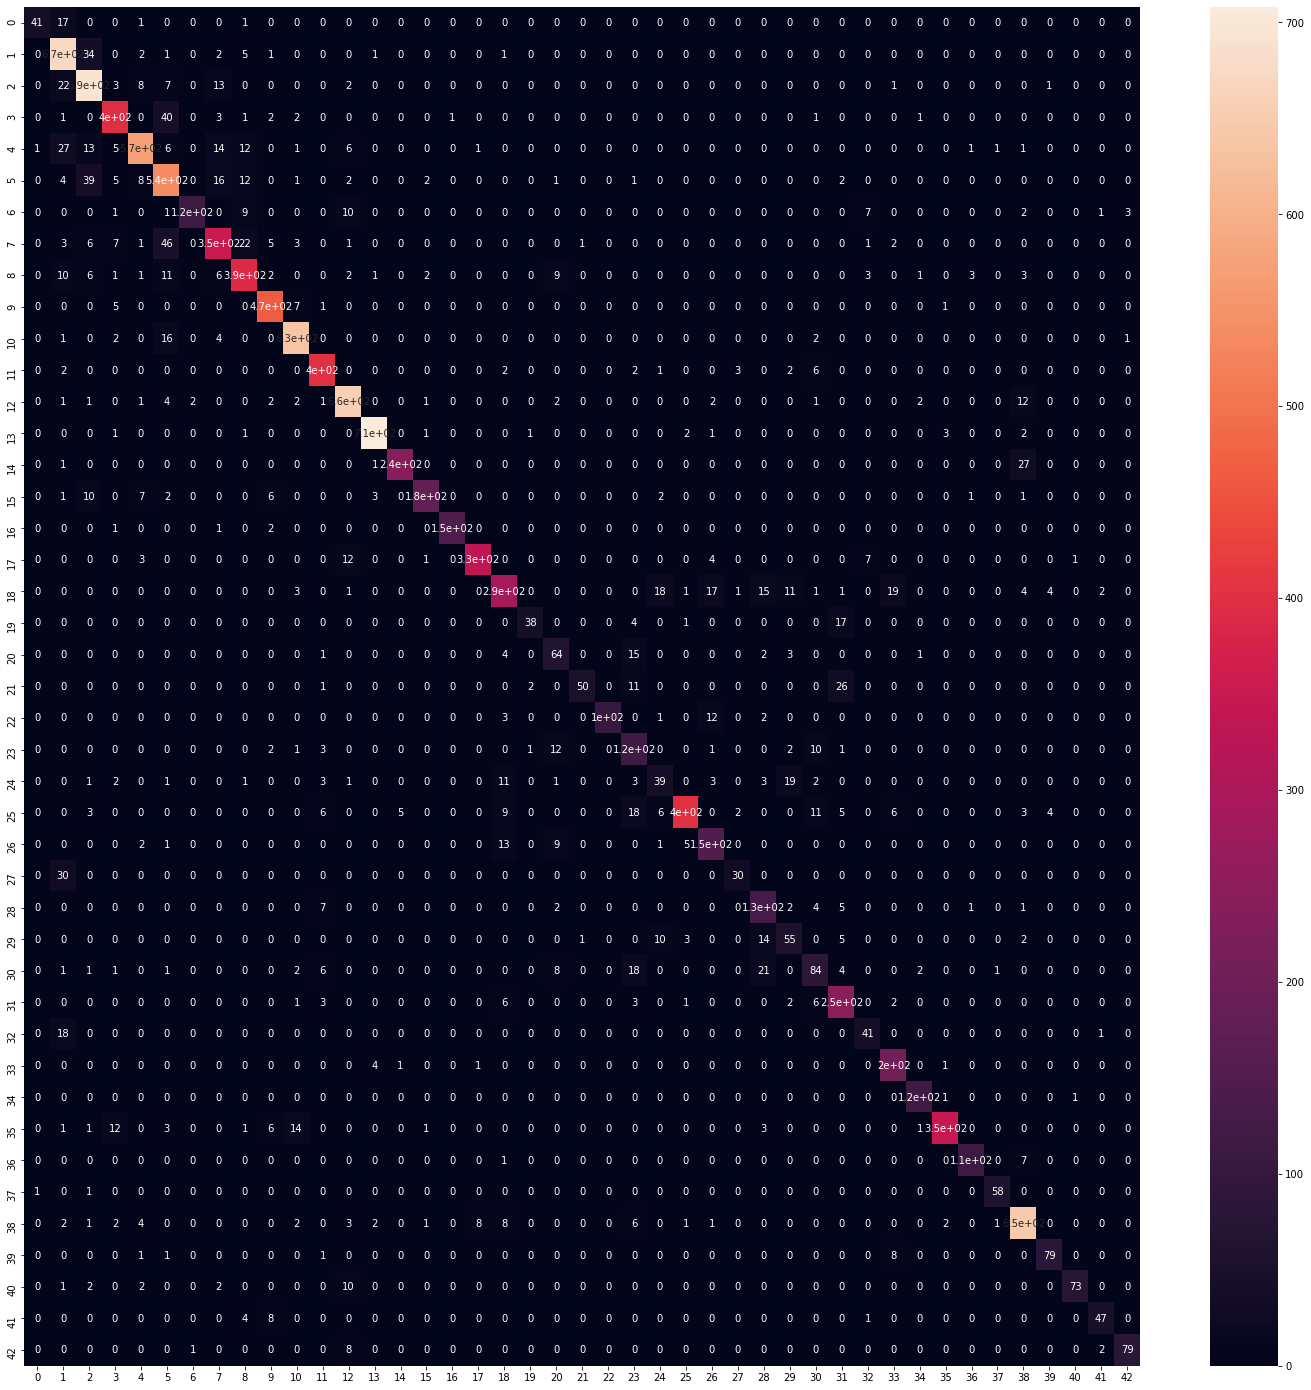

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

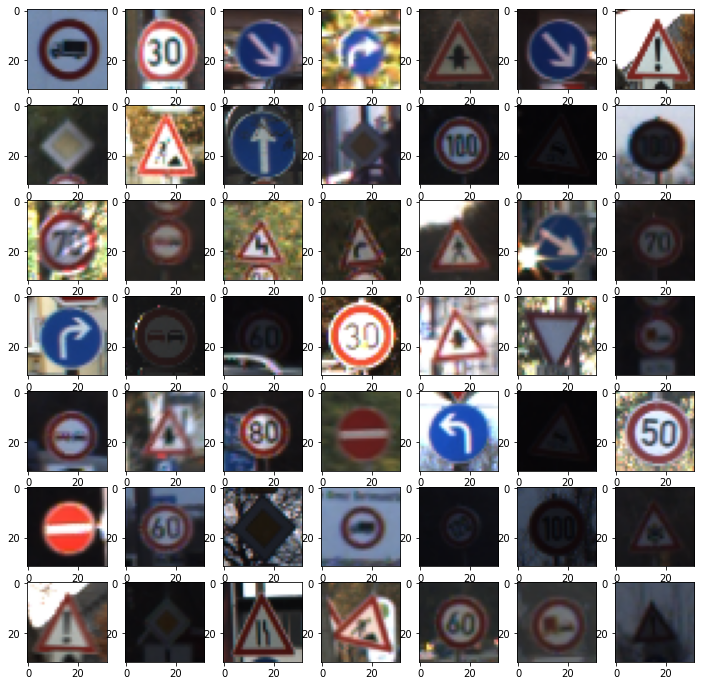

In [62]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 


for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    

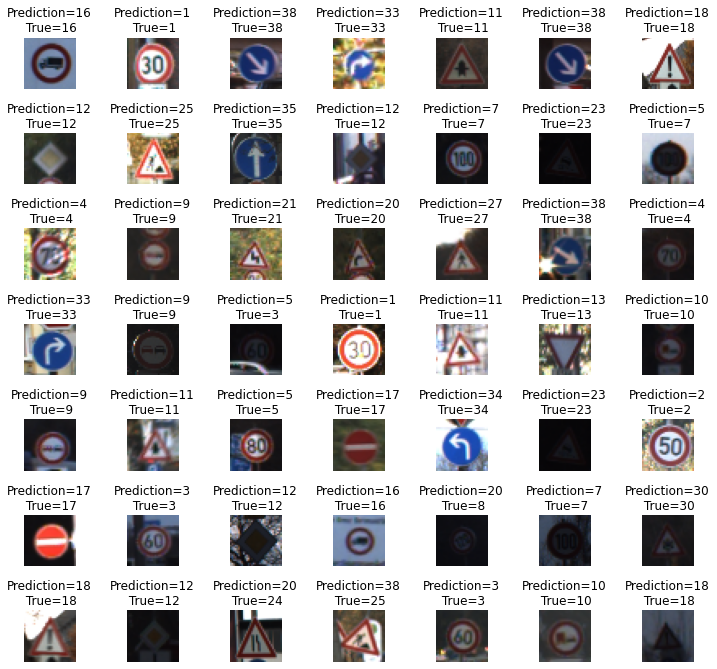

In [59]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)